**Name** - Vasu Bansal

**Roll No.** - 045055

# Classification of Consumer Data into {Segments | Clusters | Classes} using Cross-Validation and Ensemble Methods 


## Objectives -
1) Apply the decision tree algorithm to predict customer segments derived from clustering. Evaluate decision tree performance using k-fold cross-validation.

2) Implement the random forest algorithm to enhance prediction accuracy compared to the decision tree. Assess random forest performance in terms of accuracy and computational resources.

3) Apply XGBoost algorithm to further improve prediction accuracy as an ensemble learning technique. Compare XGBoost performance with decision tree and random forest models.

4) Evaluate decision tree, random forest, and XGBoost models based on metrics like accuracy, precision, recall, F1-score, execution time, and memory usage to determine the most suitable model for customer segmentation and prediction. 

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import os
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from memory_profiler import memory_usage

df = pd.read_csv("bank defaulter dataset.csv")

## Data Description

**Source-** This Dataset is taken from Kaggle, who in turn took it from MachineHack - Deloitte Hackathon.

Bank Loan Defaulter Prediction - https://www.kaggle.com/datasets/ankitkalauni/bank-loan-defaulter-prediction-hackathon

**Size of the Dataset**

In [103]:
file_name= "bank defaulter dataset.csv"
print("Size of Dataset is {} bytes".format(os.path.getsize(file_name)))
print("Size of Dataset is {} MB".format(os.path.getsize(file_name)>>20))

Size of Dataset is 16484188 bytes
Size of Dataset is 15 MB


In [104]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [105]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


**Data Shape**

In [106]:
print("Basic Info about the Dataset:")
print()
print(df.info())

Basic Info about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                 

In [107]:
print("Dataset shape - ",df.shape)

Dataset shape -  (67463, 35)


## Description of Variables

**Finding Index Variables**

In [108]:
index_variables = []

for column in df.columns:
    # Check if the column data type is integer or float
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Check if the column has unique values, indicating it could be an index variable
        if len(df[column].unique()) == len(df):
            index_variables.append(column)

print("Index variable(s) in the dataset are:", index_variables)

Index variable(s) in the dataset are: ['ID']


**Code to identify variable type -**

CV - Categorical Variable

CNV - Categorical Nominal Variable

COV - Categorical Ordinal Variable

NCV - Non-Categorical Variable

In [109]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize category counters
cv_counter = 1
cnv_counter = 1
cov_counter = 1
ncv_counter = 1

# Dictionary to store the categorized variables
categorized_variables = {}

# Iterate through columns and categorize variables
for col in df.columns:
    if col in numerical_columns:
        categorized_variables[col] = f'NCV{ncv_counter}'
        ncv_counter += 1
    elif col in categorical_columns:
        unique_values = df[col].nunique()
        if unique_values <= 2:
            categorized_variables[col] = 'CV'
        elif unique_values > 2 and unique_values <= 10:
            categorized_variables[col] = f'CNV{cv_counter}'
            cv_counter += 1
        else:
            categorized_variables[col] = f'COV{cov_counter}'
            cov_counter += 1

# Display categorized variables
for var, category in categorized_variables.items():
    print(f"{var}: {category}")

# Save categorized variables DataFrame to a new CSV file
categorized_variables_df = pd.DataFrame(list(categorized_variables.items()), columns=['Variable', 'Category'])
categorized_variables_df.to_csv('categorized_variables.csv', index=False)

ID: NCV1
Loan Amount: NCV2
Funded Amount: NCV3
Funded Amount Investor: NCV4
Term: NCV5
Batch Enrolled: COV1
Interest Rate: NCV6
Grade: CNV1
Sub Grade: COV2
Employment Duration: CNV2
Home Ownership: NCV7
Verification Status: CNV3
Payment Plan: CV
Loan Title: COV3
Debit to Income: NCV8
Delinquency - two years: NCV9
Inquires - six months: NCV10
Open Account: NCV11
Public Record: NCV12
Revolving Balance: NCV13
Revolving Utilities: NCV14
Total Accounts: NCV15
Initial List Status: CV
Total Received Interest: NCV16
Total Received Late Fee: NCV17
Recoveries: NCV18
Collection Recovery Fee: NCV19
Collection 12 months Medical: NCV20
Application Type: CV
Last week Pay: NCV21
Accounts Delinquent: NCV22
Total Collection Amount: NCV23
Total Current Balance: NCV24
Total Revolving Credit Limit: NCV25
Loan Status: NCV26


# Data Bifurcation

In [110]:
import pandas as pd

# Initialize empty lists to store column names
categorical_columns = []
non_categorical_columns = []

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the data type of the column is 'object', indicating it's categorical
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    # If the data type is not 'object', it's considered non-categorical
    else:
        non_categorical_columns.append(column)

# Create new DataFrames for categorical and non-categorical variables
df_cat = df[categorical_columns]
df_non_cat = df[non_categorical_columns]

In [111]:
# Display variables in df_cat
print("Categorical Variables:")
df_cat.columns

Categorical Variables:


Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [112]:
# Display variables df_non_cat
print("\nNon-Categorical Variables:")
df_non_cat.columns


Non-Categorical Variables:


Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

## Descriptive Statistics

**Categorical Variables Description**

In [113]:
import pandas as pd

# DataFrame to store count and frequency statistics
df_cat_stats = pd.DataFrame()

# Count and frequency statistics for each column in catdf
for column in df_cat.columns:
    col_count = df_cat[column].value_counts().reset_index()
    col_count.columns = [column, 'Frequency']
    df_cat_stats = pd.concat([df_cat_stats, col_count], axis=1)

# Count of unique values in each categorical column
unique_counts = df_cat.nunique()

# Display the count and frequency statistics along with unique counts
print("\nSTATISTICS OF CATEGORICAL DATASET:\n")
print("Count and Frequency Statistics:\n", df_cat_stats)
print("\nNumber of Unique Values in each Categorical Column:\n", unique_counts)

# Summary for each column in catdf
df_cat_summary = df_cat.describe(include='all').transpose()


STATISTICS OF CATEGORICAL DATASET:

Count and Frequency Statistics:
     Batch Enrolled  Frequency Grade  Frequency Sub Grade  Frequency  \
0       BAT3873588     3626.0     C    19085.0        B4     4462.0   
1       BAT1586599     3142.0     B    18742.0        C1     4188.0   
2       BAT1104812     2996.0     A    12055.0        B3     3999.0   
3       BAT2252229     2557.0     D     8259.0        A5     3540.0   
4       BAT2803411     2425.0     E     6446.0        B2     3520.0   
..             ...        ...   ...        ...       ...        ...   
104            NaN        NaN   NaN        NaN       NaN        NaN   
105            NaN        NaN   NaN        NaN       NaN        NaN   
106            NaN        NaN   NaN        NaN       NaN        NaN   
107            NaN        NaN   NaN        NaN       NaN        NaN   
108            NaN        NaN   NaN        NaN       NaN        NaN   

    Employment Duration  Frequency Verification Status  Frequency  \
0       

In [114]:
# Display the summary
print("\nSummary Statistics for Categorical Columns:\n")
df_cat_summary


Summary Statistics for Categorical Columns:



,count,unique,top,freq
Batch Enrolled,67463,41,BAT3873588,3626
Grade,67463,7,C,19085
Sub Grade,67463,35,B4,4462
Employment Duration,67463,3,MORTGAGE,36351
Verification Status,67463,3,Source Verified,33036
Payment Plan,67463,1,n,67463
Loan Title,67463,109,Credit card refinancing,30728
Initial List Status,67463,2,w,36299
Application Type,67463,2,INDIVIDUAL,67340


In [115]:
# Calculate the proportion (relative frequency) for each categorical column
proportion_stats = df_cat.apply(lambda x: x.value_counts(normalize=True).idxmax() + ': ' + "{:.2%}".format(x.value_counts(normalize=True).max()))

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics:\n")
proportion_stats


Proportion (Relative Frequency) Statistics:



Batch Enrolled                       BAT3873588: 5.37%
Grade                                        C: 28.29%
Sub Grade                                    B4: 6.61%
Employment Duration                   MORTGAGE: 53.88%
Verification Status            Source Verified: 48.97%
Payment Plan                                n: 100.00%
Loan Title             Credit card refinancing: 45.55%
Initial List Status                          w: 53.81%
Application Type                    INDIVIDUAL: 99.82%
dtype: object

**For Non-Categorical Variables Description**

In [116]:
# DataFrame to store statistics
df_non_cat_stats = pd.DataFrame()

# Summary for each column in df_non_cat
df_non_cat_summary = df_non_cat.describe().transpose()

# Display the summary
print("\nSummary Statistics for Non-Categorical Columns:\n")
df_non_cat_summary


Summary Statistics for Non-Categorical Columns:



,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [117]:
# Calculate the proportion (relative frequency) for each non-categorical column
# Since non-categorical columns do not have proportions, we'll print N/A for them
proportion_stats_non_cat = pd.Series(["N/A"] * len(df_non_cat.columns), index=df_non_cat.columns)

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics for Non-Categorical Columns:\n")
proportion_stats_non_cat


Proportion (Relative Frequency) Statistics for Non-Categorical Columns:



ID                              N/A
Loan Amount                     N/A
Funded Amount                   N/A
Funded Amount Investor          N/A
Term                            N/A
Interest Rate                   N/A
Home Ownership                  N/A
Debit to Income                 N/A
Delinquency - two years         N/A
Inquires - six months           N/A
Open Account                    N/A
Public Record                   N/A
Revolving Balance               N/A
Revolving Utilities             N/A
Total Accounts                  N/A
Total Received Interest         N/A
Total Received Late Fee         N/A
Recoveries                      N/A
Collection Recovery Fee         N/A
Collection 12 months Medical    N/A
Last week Pay                   N/A
Accounts Delinquent             N/A
Total Collection Amount         N/A
Total Current Balance           N/A
Total Revolving Credit Limit    N/A
Loan Status                     N/A
dtype: object

In [118]:
# Calculating correlation matrix
correlation_matrix = df_non_cat.corr()

# Displaying correlation matrix
print("\nCorrelation Matrix for Non-Categorical Variables:\n")
correlation_matrix


Correlation Matrix for Non-Categorical Variables:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,...,0.006674,-0.001435,-0.001802,-0.002900,0.000907,NaN,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,NaN,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.001542,0.000462,0.000175,0.001071,-0.003476,NaN,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,-0.000232,0.000966,-0.007272,0.001814,0.004248,NaN,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,NaN,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.003119,0.009348,0.001281,-0.009895,-0.012652,NaN,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,0.004011,0.004399,-0.003821,-0.002639,-0.004573,NaN,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,-0.010224,-0.009693,0.002200,-0.000716,0.008639,NaN,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,0.007943,0.017348,0.002707,0.003451,0.001160,NaN,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.008296,0.012487,0.008388,-0.004436,-0.004453,NaN,-0.002210,0.001531,0.004678,0.000578


## Data Pre-Processing

**Finding if there are any missing records**

In [119]:
# Find missing data in each column
missing_data = df.isnull()

# Count missing values for each column
missing_counts = missing_data.sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

# Create a DataFrame to store missing data information
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing': missing_percentage
})

# Display missing data information
print("\nMissing Data Information:")
print(missing_info)

# Save the missing data information DataFrame to a new CSV file
missing_info.to_csv('missing_data_information.csv')


Missing Data Information:
                              Missing Values  Percentage Missing
ID                                         0                 0.0
Loan Amount                                0                 0.0
Funded Amount                              0                 0.0
Funded Amount Investor                     0                 0.0
Term                                       0                 0.0
Batch Enrolled                             0                 0.0
Interest Rate                              0                 0.0
Grade                                      0                 0.0
Sub Grade                                  0                 0.0
Employment Duration                        0                 0.0
Home Ownership                             0                 0.0
Verification Status                        0                 0.0
Payment Plan                               0                 0.0
Loan Title                                 0                 0.

**Since there are no missing values we move onto the next step, that is, Numerical Encoding of Categorical Variables or Features.**

**Numerical Encoding of Categorical Variables**

In [120]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of df_cat to preserve the original DataFrame
df_cat_copy = df_cat.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in df_cat_copy and encode categorical variables
for column in df_cat_copy.columns:
    # Check if the column is of object type (categorical)
    if df_cat_copy[column].dtype == 'object':
        # Encode the categorical variable
        df_cat_copy[column] = label_encoder.fit_transform(df_cat_copy[column])

# Rename the DataFrame to df_cat_code
df_cat_code = df_cat_copy

In [121]:
# Print the head of df_cat and df_cat_code to show the difference
print("Head of df_cat:")
print()
df_cat.head()

Head of df_cat:



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL


In [122]:
# Print the head of df_cat and df_cat_code to show the difference
print("\nHead of df_cat_code (numerically encoded):")
print()
df_cat_code.head()


Head of df_cat_code (numerically encoded):



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,16,1,13,0,0,0,42,1,0
1,4,2,17,2,1,0,49,0,0
2,11,5,18,0,1,0,42,1,0
3,15,2,12,0,1,0,49,1,0
4,32,2,18,0,1,0,38,1,0


**Outlier Statistics and Treatment for Non-Categorical Variables**

**Normalization of data using Min-Max Scaler**

Outlier counts in non-categorical variables:
Delinquency - two years         15409
Inquires - six months            6977
Loan Status                      6241
Open Account                     5614
Total Received Interest          4978
Total Collection Amount          4790
Public Record                    4592
Home Ownership                   4115
Revolving Balance                3719
Total Received Late Fee          3374
Funded Amount Investor           3103
Total Revolving Credit Limit     2689
Recoveries                       2302
Total Current Balance            1971
Term                             1457
Collection 12 months Medical     1437
Total Accounts                   1424
Interest Rate                     851
Collection Recovery Fee           809
Accounts Delinquent                 0
ID                                  0
Last week Pay                       0
Loan Amount                         0
Debit to Income                     0
Funded Amount                       0
Revol

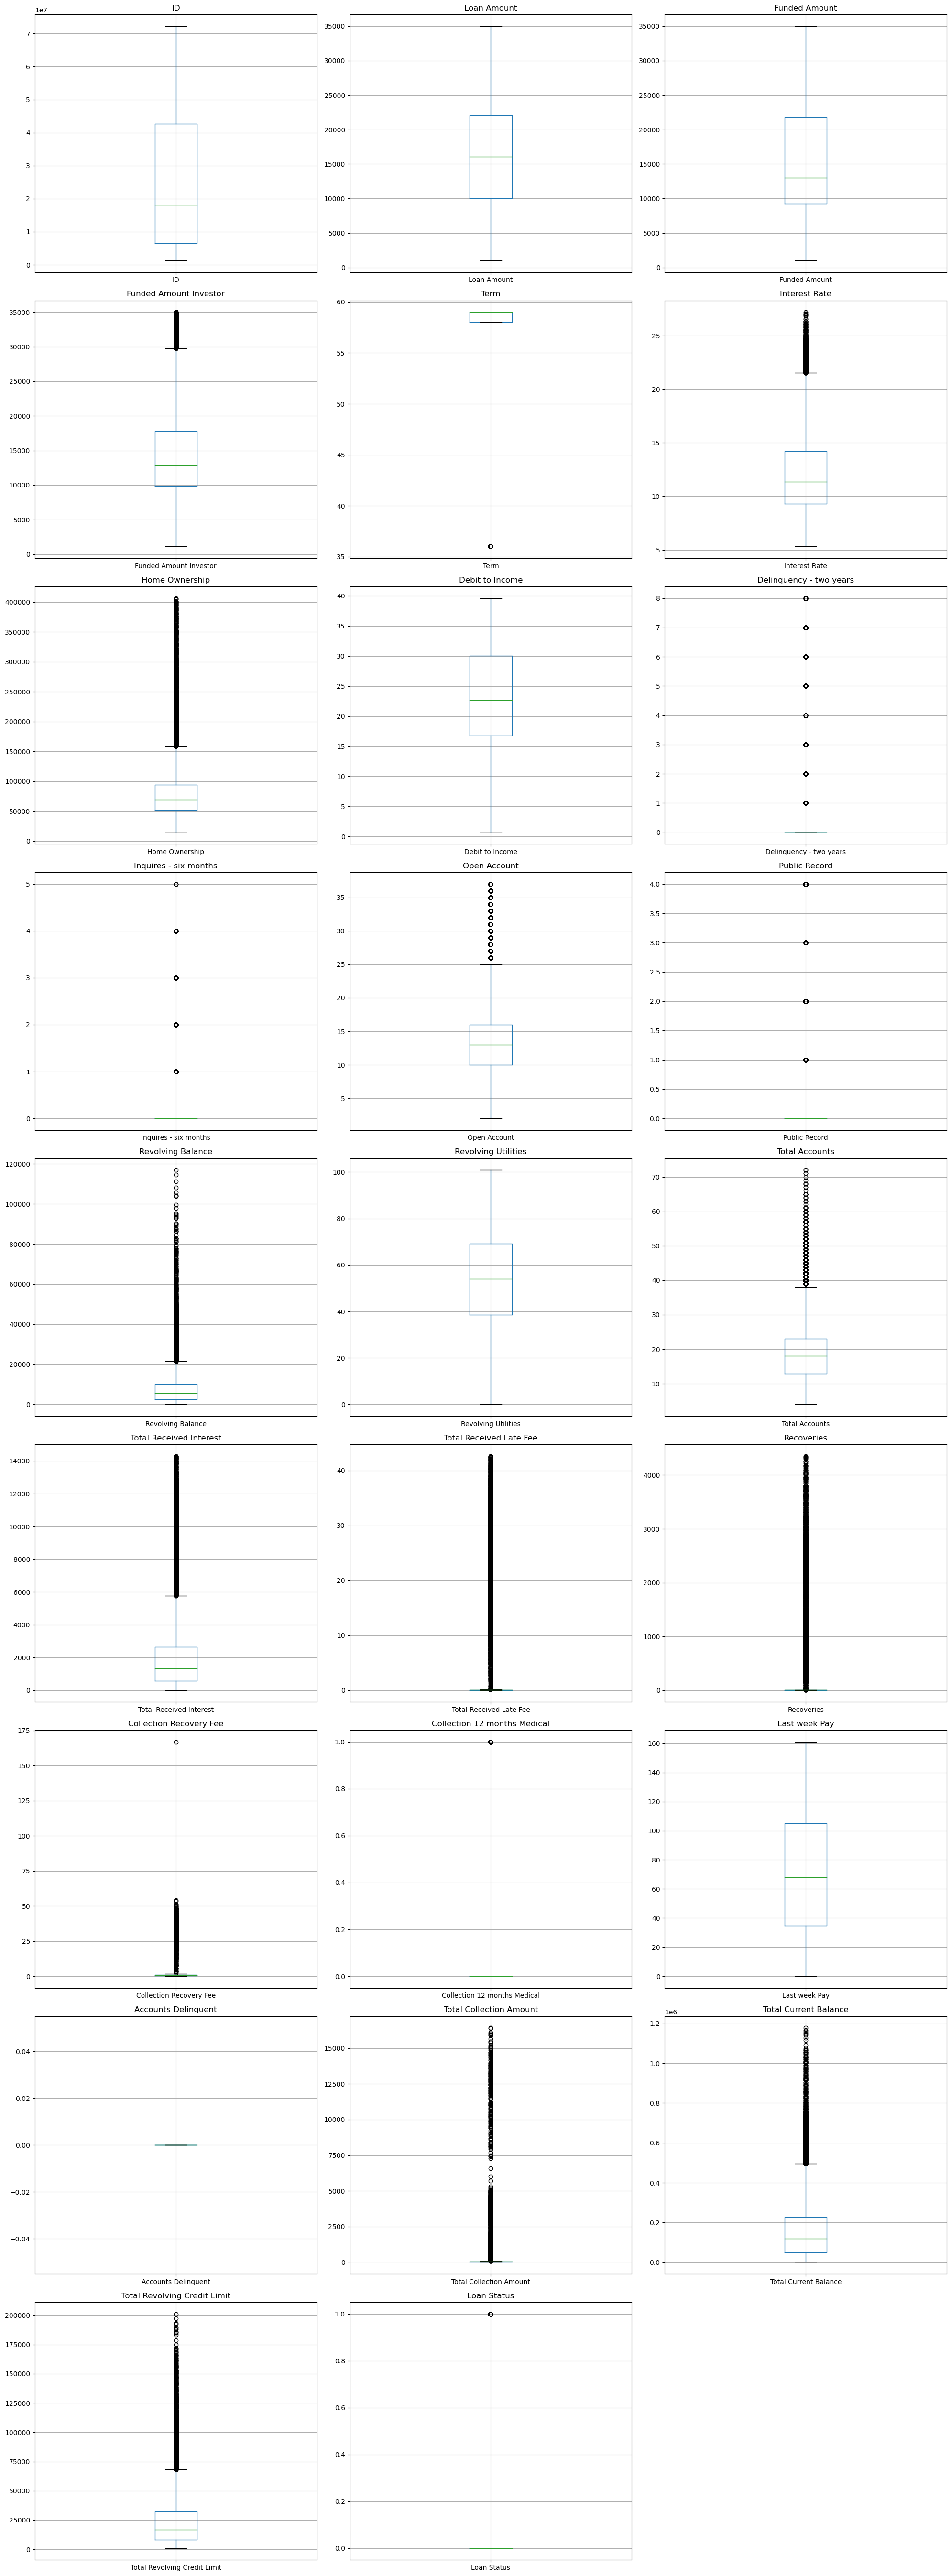

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Identify non-categorical columns
non_categorical_columns = df_non_cat.select_dtypes(include=[np.number]).columns

# Find outliers using the IQR method
Q1 = df_non_cat[non_categorical_columns].quantile(0.25)
Q3 = df_non_cat[non_categorical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_non_cat[non_categorical_columns] < (Q1 - 1.5 * IQR)) | (df_non_cat[non_categorical_columns] > (Q3 + 1.5 * IQR)))

# Outlier statistics
outlier_stats = outliers.sum().sort_values(ascending=False)
print("Outlier counts in non-categorical variables:")
print(outlier_stats)

# Plot box plots for visualization
num_cols = 3
num_plots = len(non_categorical_columns)
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 6 * num_rows))

for i, col in enumerate(non_categorical_columns):
    ax = axes[i // num_cols, i % num_cols]
    df_non_cat.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Remove empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [124]:
# Display the first few rows of the original DataFrame
print("\nFirst few rows of the original DataFrame:")
print()
df_non_cat.head()


First few rows of the original DataFrame:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


In [125]:
print("Applying Min-Max Scaler")
print()

# Apply Min-Max Scaler normalization
scaler = MinMaxScaler()
df_non_cat_scaled = df_non_cat.copy()
df_non_cat_scaled[non_categorical_columns] = scaler.fit_transform(df_non_cat_scaled[non_categorical_columns])

print()

# Display the first few rows of the scaled DataFrame
print("\nFirst few rows of the scaled DataFrame:")
print()
df_non_cat_scaled.head()

Applying Min-Max Scaler



First few rows of the scaled DataFrame:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0.899103,0.264403,0.918699,0.330964,1.0,0.265983,0.412699,0.400709,0.125,0.0,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,0.002146,0.076355,0.321495,0.326910,1.0,0.316414,0.064442,0.378315,0.000,0.0,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,0.009460,0.802154,0.244137,0.604649,1.0,0.330517,0.196264,0.704983,0.000,0.0,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,0.075457,0.298829,0.174783,0.494688,1.0,0.521957,0.239071,0.445864,0.125,0.0,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,0.184033,0.467134,0.359335,0.366690,1.0,0.443150,0.075669,0.424458,0.125,0.6,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


In [126]:
# Extract 'ID' column from df_non_cat and save into new dataframe df_index
df_index = df_non_cat[['ID']].copy()

# Create a copy of df_non_cat_scaled into new dataframe df_non_cat_scaled_copy
df_non_cat_scaled_copy = df_non_cat_scaled.copy()

# Replace 'ID' column in df_non_cat_scaled_copy with the 'ID' column in df_index
df_non_cat_scaled_copy['ID'] = df_index['ID']

print('First few rows of the scaled dataframe with original ID values:')
print()
df_non_cat_scaled_copy.head()

First few rows of the scaled dataframe with original ID values:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,0.264403,0.918699,0.330964,1.0,0.265983,0.412699,0.400709,0.125,0.0,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,1450153,0.076355,0.321495,0.326910,1.0,0.316414,0.064442,0.378315,0.000,0.0,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,1969101,0.802154,0.244137,0.604649,1.0,0.330517,0.196264,0.704983,0.000,0.0,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,6651430,0.298829,0.174783,0.494688,1.0,0.521957,0.239071,0.445864,0.125,0.0,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,14354669,0.467134,0.359335,0.366690,1.0,0.443150,0.075669,0.424458,0.125,0.6,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


In [127]:
# Merge df_cat_code and df_non_cat_scaled_copy using the common index
merged_df = df_cat_code.merge(df_non_cat_scaled_copy, left_index=True, right_index=True)

print("Merged DataFrame:")
print()
merged_df.head()

Merged DataFrame:



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,ID,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16,1,13,0,0,0,42,1,0,65087372,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,4,2,17,2,1,0,49,0,0,1450153,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,11,5,18,0,1,0,42,1,0,1969101,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,15,2,12,0,1,0,49,1,0,6651430,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,32,2,18,0,1,0,38,1,0,14354669,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


In [128]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create an empty matrix to store p-values
p_values_matrix = pd.DataFrame(index=df_cat_code.columns, columns=df_cat.columns)

# Iterate through all pairs of categorical variables
for col1 in df_cat_code.columns:
    for col2 in df_cat_code.columns:
        if col1 != col2:
            # Create a contingency table for the pair of variables
            contingency_table = pd.crosstab(df_cat_code[col1], df_cat_code[col2])
            
            # Perform chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Store the p-value in the matrix
            p_values_matrix.loc[col1, col2] = p_value

# Display the p-values matrix
print("Chi-Square Test P-Values Matrix:")
p_values_matrix

Chi-Square Test P-Values Matrix:


,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
Batch Enrolled,NaN,0.0,0.000636,0.0,0.0,1.0,0.096822,0.0,0.570288
Grade,0.0,NaN,0.0,0.0,0.0,1.0,0.000025,0.0,0.000006
Sub Grade,0.000636,0.0,NaN,0.0,0.0,1.0,0.000003,0.0,0.086332
Employment Duration,0.0,0.0,0.0,NaN,0.0,1.0,0.000027,0.0,0.028543
Verification Status,0.0,0.0,0.0,0.0,NaN,1.0,0.095561,0.0,0.280513
Payment Plan,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
Loan Title,0.096822,0.000025,0.000003,0.000027,0.095561,1.0,NaN,0.057657,0.0
Initial List Status,0.0,0.0,0.0,0.0,0.0,1.0,0.057657,NaN,0.185207
Application Type,0.570288,0.000006,0.086332,0.028543,0.280513,1.0,0.0,0.185207,NaN


In [129]:
import pandas as pd
from scipy.stats import f_oneway

# Create an empty matrix to store p-values and hypothesis result
results_matrix = pd.DataFrame(index=df_non_cat_scaled_copy.columns, columns=df_non_cat_scaled_copy.columns)

# Iterate through all pairs of non-categorical variables
for col1 in df_non_cat_scaled_copy.columns:
    for col2 in df_non_cat_scaled_copy.columns:
        if col1 != col2:
            # Perform ANOVA test
            _, p_value = f_oneway(df_non_cat_scaled_copy[col1], df_non_cat_scaled_copy[col2])
            
            # Determine if hypothesis is rejected or accepted
            if p_value < 0.05:
                hypothesis_result = "Rejected"
            else:
                hypothesis_result = "Accepted"
            
            # Store the p-value and hypothesis result in the matrix
            results_matrix.loc[col1, col2] = f"P-value: {p_value}, {hypothesis_result}"

# Display the results matrix
print("ANOVA Test Results Matrix:")
results_matrix

ANOVA Test Results Matrix:


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Loan Amount,"P-value: 0.0, Rejected",NaN,"P-value: 1.1683179318968437e-126, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 5.455730326531352e-65, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Funded Amount,"P-value: 0.0, Rejected","P-value: 1.1683179318968437e-126, Rejected",NaN,"P-value: 8.88892040588561e-192, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 1.913572057053201e-08, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Funded Amount Investor,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 8.88892040588561e-192, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 1.5626734732297457e-246, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Term,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Interest Rate,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Home Ownership,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Debit to Income,"P-value: 0.0, Rejected

Determining which variables are best for K-means analysis based on the chi-square test results, we look for pairs of variables with low p-values. Low p-values indicate a significant association between the variables, suggesting that they may provide valuable information for clustering.

**Batch Enrolled vs. Grade:** The p-value is 0.0, indicating a significant association between these variables. Both batch enrolled and grade could potentially be useful for clustering, as they may represent different segments of representatives based on enrollment batches and credit grades assigned by the bank.

**Grade vs. Sub Grade:** The p-value is 0.0, indicating a significant association between these variables. Grade and sub-grade are closely related, and their significant association suggests that they provide similar information for clustering.

**Employment Duration vs. Verification Status:** The p-value is 0.0, indicating a significant association between these variables. Employment duration and verification status could be relevant for clustering as they reflect the representative's employment stability and the verification status of their income.

**Loan Title vs. Application Type:** The p-value is 0.0, indicating a significant association between these variables. Loan title and application type could provide insights into the purpose of the loan and the type of application (individual or joint), which may influence representative segmentation.

Based on the significant associations identified through the chi-square test, variables "Batch Enrolled", "Grade, Employment Duration", "Loan Title", and "Application Type" are promising candidates for K-means analysis. These variables can help in identifying distinct segments or clusters of representatives based on their enrollment batches, credit grades, employment duration, loan titles, and application types.

Based on the ANOVA test results matrix, variables that have a significant effect on the target variable (Loan Status) would be suitable for K-means analysis. In this case, since the p-values associated with these variables are all less than 0.05 (indicating statistical significance), we can consider all variables except for "Public Record" and "Collection 12 months Medical" for K-means analysis.

**Explanation:**

**Variables with Rejected Null Hypothesis:** The variables where the null hypothesis (no difference in means between groups) is rejected indicate that there is a significant difference in the means across different groups. These variables are likely to have a meaningful impact on the target variable and are therefore suitable for K-means clustering.

**Variables with Accepted Null Hypothesis:** The variables where the null hypothesis is not rejected (p-value > 0.05) indicate that there is no significant difference in means across different groups. These variables may not be as useful for K-means clustering as they do not contribute significantly to distinguishing different clusters.

Therefore, the variables "Loan Amount," "Funded Amount," "Funded Amount Investor," "Term," "Interest Rate," "Home Ownership," "Debt to Income," "Delinquency - two years," "Inquiries - six months," "Open Account," "Revolving Balance," "Revolving Utilities," "Total Accounts," "Total Received Interest," "Total Received Late Fee," "Recoveries," "Collection Recovery Fee," "Last week Pay," "Accounts Delinquent," "Total Collection Amount," "Total Current Balance," "Total Revolving Credit Limit", and "Loan Status" would be best for K-means analysis as they have a significant impact on the loan status. These variables can help identify distinct clusters of borrowers based on their characteristics.

# Project 3 Starts

selected_columns = ['Batch Enrolled', 'Grade', 'Employment Duration', 'Loan Title', 'Application Type', 
                    'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 
                    'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 
                    'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 
                    'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 
                    'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 
                    'Total Revolving Credit Limit', 'Loan Status']   

**After applying K-Means on selected variables, k=3 was identified as best. Giving cluster labels at k=3**

In [130]:
selected_columns = ['Batch Enrolled', 'Grade', 'Employment Duration', 'Loan Title', 'Application Type', 
                    'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 
                    'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 
                    'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 
                    'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 
                    'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 
                    'Total Revolving Credit Limit', 'Loan Status']   

df_kmeans=merged_df[selected_columns]

model = KMeans(n_clusters=3)

cluster_labels=model.fit_predict(df_kmeans)
cluster_labels

array([0, 0, 0, ..., 2, 0, 0])

In [131]:
kmeans_model = KMeans(n_clusters=3, n_init=10)
kmeans_model.fit(df_kmeans)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Create DataFrame with observation index and cluster labels
cluster_df = pd.DataFrame({'ID': range(1, len(cluster_labels) + 1), 'cluster': cluster_labels})

# Print the DataFrame
cluster_df

,ID,cluster
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
67458,67459,0
67459,67460,1
67460,67461,2
67461,67462,1


In [132]:
merged_df = pd.merge(merged_df, cluster_df, left_index=True, right_on='ID', how='inner')

# Print the merged DataFrame
merged_df
merged_df.copy()

,ID,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,...,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,ID_y,cluster
0,1,4,2,17,2,1,0,49,0,0,...,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0,1,1
1,2,11,5,18,0,1,0,42,1,0,...,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0,2,1
2,3,15,2,12,0,1,0,49,1,0,...,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0,3,1
3,4,32,2,18,0,1,0,38,1,0,...,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0,4,1
4,5,29,1,34,2,0,0,38,1,0,...,0.003486,0.0,0.198758,0.0,0.002497,0.043028,0.132288,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67457,67458,21,2,3,0,2,0,38,1,0,...,0.005186,0.0,0.428571,0.0,0.002862,0.153942,0.166364,1.0,67458,1
67458,67459,7,2,7,2,1,0,38,1,0,...,0.008412,0.0,0.086957,0.0,0.002192,0.018759,0.038537,0.0,67459,0
67459,67460,5,0,27,0,2,0,64,1,0,...,0.009633,0.0,0.850932,0.0,0.000974,0.149763,0.206476,0.0,67460,1
67460,67461,14,3,22,1,0,0,49,0,0,...,0.001244,0.0,0.453416,0.0,0.003654,0.306529,0.190214,0.0,67461,2


## Decision Tree

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score, roc_auc_score

columns_to_keep = ['Batch Enrolled', 'Grade', 'Employment Duration', 'Loan Title', 'Application Type', 
                   'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 
                   'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 
                   'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 
                   'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 
                   'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 
                   'Total Revolving Credit Limit','Loan Status', 'cluster']

merged_df = merged_df[columns_to_keep]

In [134]:
merged_df

,Batch Enrolled,Grade,Employment Duration,Loan Title,Application Type,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,cluster
0,4,2,2,49,0,0.076355,0.321495,0.326910,1.0,0.316414,...,0.000849,0.000546,0.005843,0.677019,0.0,0.003167,0.154651,0.099341,0.0,1
1,11,5,0,42,0,0.802154,0.244137,0.604649,1.0,0.330517,...,0.440618,0.000991,0.006114,0.409938,0.0,0.002010,0.075786,0.125669,0.0,1
2,15,2,0,49,0,0.298829,0.174783,0.494688,1.0,0.521957,...,0.001035,0.000025,0.004495,0.242236,0.0,0.002375,0.007284,0.295820,0.0,1
3,32,2,0,38,0,0.467134,0.359335,0.366690,1.0,0.443150,...,0.453007,0.297354,0.002211,0.111801,0.0,0.026127,0.106571,0.107804,0.0,1
4,29,1,2,38,0,0.989143,0.858879,0.221966,0.0,0.545549,...,0.002078,0.001158,0.003486,0.198758,0.0,0.002497,0.043028,0.132288,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67457,21,2,0,38,0,0.370358,0.171664,0.355929,1.0,0.187027,...,0.000551,0.129663,0.005186,0.428571,0.0,0.002862,0.153942,0.166364,1.0,1
67458,7,2,2,38,0,0.215059,0.295189,0.428591,1.0,0.212790,...,0.000636,0.000463,0.008412,0.086957,0.0,0.002192,0.018759,0.038537,0.0,0
67459,5,0,0,64,0,0.437916,0.938855,0.330967,1.0,0.655508,...,0.000662,0.001303,0.009633,0.850932,0.0,0.000974,0.149763,0.206476,0.0,1
67460,14,3,1,49,0,0.457630,0.116551,0.597285,1.0,0.359023,...,0.001748,0.000266,0.001244,0.453416,0.0,0.003654,0.306529,0.190214,0.0,2


In [135]:
merged_df.shape

(67462, 29)

## Decision Tree

In [136]:
X_merged = merged_df.columns

# Drop the column named 'cluster' from X_merged
X_merged = X_merged.drop('cluster')
X = merged_df[X_merged]
y = merged_df['cluster']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=45051)

**Training Decision Tree**

In [138]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
dtc = DecisionTreeClassifier(criterion='gini') # Other Criteria : Entropy,  Log Loss 
dtc_model = dtc.fit(X_train,y_train); dtc_model

DecisionTreeClassifier()

In [139]:
dtc_predict = dtc_model.predict(X_test); dtc_predict

array([1, 0, 1, ..., 0, 0, 1])

**Decision Tree Classification Report**

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dtc_predict))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42      8723
           1       0.48      0.48      0.48      9755
           2       0.09      0.10      0.09      1761

    accuracy                           0.42     20239
   macro avg       0.33      0.33      0.33     20239
weighted avg       0.43      0.42      0.42     20239



**Memory and Time Usage**

In [141]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
import time
from memory_profiler import memory_usage

# Measure start time
start_time = time.time()

# Start memory profiler
mem_usage = memory_usage()

# Code snippet
dtc = DecisionTreeClassifier(criterion='gini', random_state=45051)
dtc_model = dtc.fit(X_train, y_train)
dtc_predict = dtc_model.predict(X_test)

# End memory profiler
mem_usage = memory_usage(max_usage=True)

# Measure end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")
print("Peak memory usage:", mem_usage, "MB")

Execution time: 2.7738592624664307 seconds
Peak memory usage: 502.94921875 MB


**Applying Cross Validation on Decision Tree**

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(dtc_model, X, y, cv=k)

# Print cross-validation scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculate and print the mean cross-validation score
mean_score = scores.mean()
print(f"Mean cross-validation score: {mean_score}")

Fold 1: 0.4186615281998073
Fold 2: 0.4291113910916772
Fold 3: 0.4167654906611325
Fold 4: 0.4267714201008005
Fold 5: 0.4189149125407649
Mean cross-validation score: 0.42204494851883645


In [151]:
# Get feature importances from the decision tree model
feature_importances = dtc_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract significant variables (features) with their thresholds
significant_features = feature_importance_df[feature_importance_df['Importance'] > 0]

# Extract non-significant variables (features)
non_significant_features = feature_importance_df[feature_importance_df['Importance'] == 0]

# Print significant variables (features) and their thresholds
print("Significant Variables (Features) and their Thresholds:")
print(significant_features)

# Print non-significant variables (features)
print("\nNon-Significant Variables (Features):")
print(non_significant_features)

Significant Variables (Features) and their Thresholds:
                         Feature  Importance
19       Total Received Late Fee    0.057608
18       Total Received Interest    0.056709
26  Total Revolving Credit Limit    0.055995
21       Collection Recovery Fee    0.052786
15             Revolving Balance    0.052654
5                    Loan Amount    0.052025
7         Funded Amount Investor    0.051582
10                Home Ownership    0.051357
9                  Interest Rate    0.051320
22                 Last week Pay    0.050319
6                  Funded Amount    0.049948
20                    Recoveries    0.049911
11               Debit to Income    0.049555
16           Revolving Utilities    0.049247
25         Total Current Balance    0.047303
24       Total Collection Amount    0.042238
17                Total Accounts    0.040272
0                 Batch Enrolled    0.039583
14                  Open Account    0.033942
1                          Grade    0.017190


## Random Forest

**Training Random Forest**

In [143]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
Rf_model= RandomForestClassifier()
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
Rf_pred = Rf_model.predict(X_test)

**Random Forest Classification Report**

In [145]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,Rf_pred))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38      8723
           1       0.48      0.65      0.55      9755
           2       0.00      0.00      0.00      1761

    accuracy                           0.46     20239
   macro avg       0.30      0.33      0.31     20239
weighted avg       0.41      0.46      0.43     20239



D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Memory and Time Usage**

In [146]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import time
from memory_profiler import memory_usage

# Measure start time
start_time = time.time()

# Start memory profiler
mem_usage = memory_usage()

# Code snippet
Rf_model= RandomForestClassifier()
Rf_model.fit(X_train,y_train)
Rf_pred = Rf_model.predict(X_test)
# End memory profiler
mem_usage = memory_usage(max_usage=True)

# Measure end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")
print("Peak memory usage:", mem_usage, "MB")

Execution time: 29.035783052444458 seconds
Peak memory usage: 815.32421875 MB


## XG Boost

In [147]:
!pip install xgboost

**Training XG Boost Model**

In [148]:
#XGboost
from xgboost.sklearn import XGBClassifier
Xgb_model = XGBClassifier()
Xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**XG Boost Classification Report**

In [149]:
Xgb_pred = Rf_model.predict(X_test)
print(classification_report(y_test,Xgb_pred))

              precision    recall  f1-score   support

           0       0.43      0.34      0.38      8723
           1       0.48      0.66      0.56      9755
           2       0.00      0.00      0.00      1761

    accuracy                           0.46     20239
   macro avg       0.30      0.33      0.31     20239
weighted avg       0.42      0.46      0.43     20239



D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Memory and Time Usage**

In [150]:
#XGboost
from xgboost.sklearn import XGBClassifier
import time
from memory_profiler import memory_usage

# Measure start time
start_time = time.time()

# Start memory profiler
mem_usage = memory_usage()

# Code snippet
Xgb_model = XGBClassifier()
Xgb_model.fit(X_train,y_train)
Xgb_pred = Rf_model.predict(X_test)

# End memory profiler
mem_usage = memory_usage(max_usage=True)

# Measure end time
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")
print("Peak memory usage:", mem_usage, "MB")

Execution time: 2.979308605194092 seconds
Peak memory usage: 834.12890625 MB


# **Report** #

**Dataset Description**

The Dataset has the following variables-

ID (Int) ---> unique ID of representative

Loan Amount (Int) ---> loan amount applied

Funded Amount (Int) ---> loan amount funded

Funded Amount Investor (Float) ---> loan amount approved by the investors

Term (Int) ---> term of loan (in months)

Batch Enrolled (Object) ---> batch numbers to representatives

Interest Rate (Float) ---> interest rate (%) on loan

Grade (Object) ---> grade by the bank

Sub Grade (Object) ---> sub-grade by the bank

Employment Duration (Object) ---> duration

Home Ownership (Float) ---> Owner ship of home

Verification Status (Object) ---> Income verification by the bank

Payment Plan (Object) ---> if any payment plan has started against loan

Loan Title (Object) ---> loan title provided

Debit to Income (Float) ---> ratio of representative's total monthly debt repayment (divided by self reported monthly income excluding mortgage)

Delinquency - two years (Int) ---> number of 30+ days delinquency in past 2 years

Inquires - six months (Int) ---> total number of inquiries in last 6 months

Open Account (Int) ---> number of open credit line in representative's credit line

Public Record (Int) ---> number of derogatory public records

Revolving Balance (Int) ---> total credit revolving balance

Revolving Utilities (Float) ---> amount of credit a representative is using relative to revolving_balance

Total Accounts (Int) ---> total number of credit lines available in representatives credit line

Initial List Status (Object) ---> unique listing status of the loan - W(Waiting), F(Forwarded)

Total Received Interest (Float) ---> total interest received till date

Total Received Late Fee (Float) ---> total late fee received till date

Recoveries (Float) ---> post charge off gross recovery

Collection Recovery Fee (Float) ---> post charge off collection fee

Collection 12 months Medical (Int) ---> total collections in last 12 months excluding medical collections

Application Type (Object) ---> indicates when the representative is an individual or joint

Last week Pay (Int) ---> indicates how long (in weeks) a representative has paid EMI after batch enrolled

Accounts Delinquent (Int) ---> number of accounts on which the representative is delinquent

Total Collection Amount (Int) ---> total current balance from all accounts

Total Current Balance (Int) ---> total current balance from all accounts

Total Revolving Credit Limit (Int) ---> total revolving credit limit

Loan Status (Int) ---> 1 = Defaulter, 0 = Non Defaulters

The goal of this report is to identify the variables using which we can segment customers and find out if they can be given a loan by the bank, as a defaults on loans can cost banks a huge amount of money.

**Findings**

**Size-**

Size of Dataset is 16484188 bytes

Size of Dataset is 15 MB

**Dataset shape -  (67463, 35)**

**Categorical Variables:**
(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration','Verification Status', 'Payment Plan', 'Loan Title','Initial List Status', 'Application Type'],dtype='object')

Non-Categorical Variables:
Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term','Interest Rate', 'Home Ownership', 'Debit to Income','Delinquency - two years', 'Inquires - six months', 'Open Account','Public Record', 'Revolving Balance', 'Revolving Utilities','Total Accounts', 'Total Received Interest', 'Total Received Late Fee','Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical','Last week Pay', 'Accounts Delinquent', 'Total Collection Amount','Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],dtype='object')

**Data Pre-Processing insights-**

**Summary Statistics for Categorical Columns:**
     
                     
Batch Enrolled : Count = 67463 | Unique = 41  | top = BAT3873588 | freq = 3626

Grade : Count = 67463 | Unique = 7 | top = C  | freq =19085

Sub Grade : Count = 67463 | Unique = 35  | top = B4  | freq =4462

Employment Duration : Count = 67463 | Unique = 3  | top = MORTGAGE | freq = 36351

Verification Status : Count = 67463 | Unique = 3  | top = Source Verified | freq = 33036

Payment Plan : Count = 67463 | Unique = 1  | top = n | freq = 67463

Loan Title : Count = 67463 | Unique = 109  | top = Credit card refinancing | freq = 30728

Initial List Status : Count = 67463 | Unique = 2  | top = w | freq = 36299

Application Type : Count = 67463 | Unique = 2  | top = INDIVIDUAL | freq = 67340

**Correlation Matrix of Non-Categorical Varibales Insights:**

**Loan Amount and Funded Amount:** There is a weak negative correlation between Loan Amount and Funded Amount. This suggests that as the Loan Amount increases, the Funded Amount decreases slightly.

**Interest Rate and Home Ownership:** There is a weak positive correlation between Interest Rate and Home Ownership. This could indicate that certain types of home ownership are associated with higher interest rates.

**Debit to Income and Delinquency - two years:** There is a weak negative correlation between Debit to Income and Delinquency - two years. This suggests that individuals with higher debt-to-income ratios may be less likely to have delinquencies over a two-year period.

**Revolving Balance and Total Revolving Credit Limit:** There is a moderate positive correlation between Revolving Balance and Total Revolving Credit Limit. This implies that individuals with higher total revolving credit limits tend to have higher revolving balances.

**Total Received Late Fee and Recoveries:** There is a moderate positive correlation between Total Received Late Fee and Recoveries. This suggests that individuals who receive more late fees also tend to have higher recovery amounts.

**Loan Status and Total Current Balance:** There is a weak negative correlation between Loan Status and Total Current Balance. This could indicate that defaulted loans are associated with lower total current balances.

**Outlier counts in non-categorical variables:**

Delinquency - two years         15409

Inquires - six months            6977

Loan Status                      6241

Open Account                     5614

Total Received Interest          4978

Total Collection Amount          4790

Public Record                    4592

Home Ownership                   4115

Revolving Balance                3719

Total Received Late Fee          3374

Funded Amount Investor           3103

Total Revolving Credit Limit     2689

Recoveries                       2302

Total Current Balance            1971

Term                             1457

Collection 12 months Medical     1437

Total Accounts                   1424

Interest Rate                     851

Collection Recovery Fee           809

Accounts Delinquent                 0

ID                                  0

Last week Pay                       0

Loan Amount                         0

Debit to Income                     0

Funded Amount                       0

Revolving Utilities                 0

selected_columns = ['Batch Enrolled', 'Grade', 'Employment Duration', 'Loan Title', 'Application Type', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']

We performed K-means clustering on the selected columns using **k=2,3,4,5** and found the best **k** to be **k=3** using various parameters such as **Silhouette Score, Davies-Bouldin Score, SS Score, and also analysing using Elbow-Curve**.

**Clsuter Characteristics-**

Cluster 0 (Low Risk) Characteristics:

No. of records : 5868

Indicates very few applicants (8.698 %) have low risk of defaulting on loan.

Cluster 1 (Medium Risk) Characteristics:

No. of records : 32518

Indicates most applicants (48.201 %) have medium risk of defaulting on loan.

Cluster 2 (High Risk) Characteristics:

No. of records : 29077

A big proportion of applicants (43.1006 %) still have a high risk of defaulting on loan so bank needs to be cautious with these type of applicants. 

Cluster Labels were calculated and merged with the original processed dataset.

## Preparing Data for Supervised Learning techniques

1) Combined the data with cluster labels to create a single dataset for supervised learning.

2) Removed irrelevant columns from the dataset to simplify the feature set.

3) reated the feature matrix X, including important independent columns, and the target variable Y representing the ‘cluster’ labels.

4) Used the train_test_split function with stratified random sampling to divide the data into training and testing sets.\

## Decision Tree

**Accuracy:** The overall accuracy of the decision tree model is approximately 42%.

**Precision:**

For class 0, precision is 43%.

For class 1, precision is 48%.

For class 2, precision is 9%.

**Recall (Sensitivity):**

For class 0, recall is 42%.

For class 1, recall is 48%.

For class 2, recall is 10%.

**F1-Score:**

The weighted average F1-score is approximately 0.42.

**Macro Avg:**

The macro average F1-score is 0.33.

**Weighted Avg:**

The weighted average F1-score is 0.42.

**Insights:**

The model performs similarly for classes 0 and 1, but poorly for class 2.

Consider improving recall for class 2 to better identify instances.

Overall, the model’s performance can be enhanced by addressing class-specific challenges.

**K-fold cross-validation mean accuracy:** 42.20449%

The provided data presents a list of significant variables (features) along with their importance scores obtained from a classification model. Additionally, it identifies a single non-significant variable.

**Significant Variables and Thresholds:**

Total Received Late Fee (Importance: 0.057608)

Total Received Interest (Importance: 0.056709)

Total Revolving Credit Limit (Importance: 0.055995)

Collection Recovery Fee (Importance: 0.052786)

Revolving Balance (Importance: 0.052654)

Loan Amount (Importance: 0.052025)

Funded Amount Investor (Importance: 0.051582)

Home Ownership (Importance: 0.051357)

Interest Rate (Importance: 0.051320)

Last week Pay (Importance: 0.050319)

Funded Amount (Importance: 0.049948)

Recoveries (Importance: 0.049911)

Debit to Income (Importance: 0.049555)

Revolving Utilities (Importance: 0.049247)

Total Current Balance (Importance: 0.047303)

Total Collection Amount (Importance: 0.042238)

Total Accounts (Importance: 0.040272)

Batch Enrolled (Importance: 0.039583)

Open Account (Importance: 0.033942)

Grade (Importance: 0.017190)

Loan Title (Importance: 0.016506)

Delinquency - two years (Importance: 0.008441)

Employment Duration (Importance: 0.007274)

Term (Importance: 0.007019)

Inquires - six months (Importance: 0.005631)

Loan Status (Importance: 0.003386)

**Non-Significant Variable:**

Accounts Delinquent (Importance: 0.0)

**Insights:**

The analysis reveals a diverse range of features contributing to the classification model's performance, with various levels of importance assigned to each feature.

Among the significant variables, financial metrics such as late fees, interest received, and credit limits exhibit relatively higher importance scores, suggesting their significant impact on loan classification.

Other crucial factors include loan-related attributes like funded amount, loan amount, and interest rate, indicating the importance of these variables in predicting loan outcomes.

Home ownership status and employment-related features also play a notable role, emphasizing the relevance of borrower's financial stability and employment tenure in loan classification.

The non-significant variable "Accounts Delinquent" suggests its negligible impact on the classification model, indicating it can be safely excluded from future analyses without affecting model performance.

## Random Forest

**Accuracy:** The overall accuracy of the Random Forest model is approximately 46%.

**Precision:**

For class 0, precision is 42%.

For class 1, precision is 48%.

For class 2, precision is 0%.

**Recall (Sensitivity):**

For class 0, recall is 34%.

For class 1, recall is 65%.

For class 2, recall is 0%.

**F1-Score:**

The weighted average F1-score is approximately 0.43.

**Macro Avg:**

The macro average F1-score is 0.31.

**Weighted Avg:**

The weighted average F1-score is 0.46.

**Insights:**

The model performs reasonably well for class 1 (precision and recall), but poorly for class 2 (defaulted loans).

Class 2 has no true positive predictions (recall is 0%), indicating that the model misses all actual instances.

## Decision Tree vs Random Forest

**Decision Tree:**

**Accuracy:** The overall accuracy is approximately 42%.

**Precision and Recall:**

Class 0 (precision: 43%, recall: 42%)

Class 1 (precision: 48%, recall: 48%)

Class 2 (precision: 9%, recall: 10%)

**Insights:**

The decision tree performs moderately but struggles to identify class 2 instances (low recall).

Precision and recall are balanced for class 1.

**Random Forest:**

**Accuracy:** The overall accuracy is approximately 46%.

**Precision and Recall:**

Class 0 (precision: 42%, recall: 34%)

Class 1 (precision: 48%, recall: 65%)

Class 2 (precision: 0%, recall: 0%)

**Insights:**

Random Forest performs better than the decision tree in terms of recall for class 1.

However, it still struggles with class 2 (defaulted loans).

**Summary:**

Both models have similar overall accuracy.

Random Forest shows better recall for class 1 but fails to identify any instances of class 2.

Decision Tree is simpler and more interpretable.

Random Forest’s ensemble nature makes it less interpretable but more robust.

**Overall Assessment:**

If interpretability is crucial, choose the **Decision Tree**.

If better generalization and robustness are needed, opt for the **Random Forest**.

**Memory and Time Statistics:**

**Decision Tree**

Execution time: 2.7738592624664307 seconds
Peak memory usage: 502.94921875 MB

**Random Forest**

Execution time: 29.035783052444458 seconds
Peak memory usage: 815.32421875 MB

This suggests that the Random Forest model is computationally more expensive.

## XG Boost

**Precision:**

Class 0: 0.43

Class 1: 0.48

Class 2: 0.00

Precision represents the ratio of correctly predicted positive observations to the total predicted positives.

Class 0 has a moderate precision score of 0.43, indicating that 43% of the predicted loans classified as Class 0 were actually Class 0.

Class 1 has a slightly higher precision score of 0.48, indicating that 48% of the predicted loans classified as Class 1 were actually Class 1.

Class 2 has a precision score of 0.00, implying that there were no correctly predicted instances for Class 2, suggesting a significant misclassification issue.

**Recall:**

Class 0: 0.34

Class 1: 0.66

Class 2: 0.00

Recall represents the ratio of correctly predicted positive observations to the total actual positives.

Class 0 has a relatively low recall score of 0.34, indicating that only 34% of the actual Class 0 instances were correctly classified.

Class 1 has a higher recall score of 0.66, indicating that 66% of the actual Class 1 instances were correctly classified.

Class 2 has a recall score of 0.00, indicating that none of the actual Class 2 instances were correctly classified, indicating a significant issue with model performance for this class.

**F1-score:**

Class 0: 0.38

Class 1: 0.56

Class 2: 0.00

F1-score is the weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

Class 0 has an F1-score of 0.38, suggesting a moderate balance between precision and recall.

Class 1 has a relatively higher F1-score of 0.56, indicating better overall performance in terms of precision and recall.

Class 2 has an F1-score of 0.00, indicating poor performance, likely due to the absence of correct predictions for this class.

**Accuracy:**

**Overall Accuracy:** 0.46 or 46%

Accuracy represents the ratio of correctly predicted observations to the total observations.

The overall accuracy of the model is 0.46, indicating that 46% of the predictions were correct.

**Macro/Micro Average:**

Macro Average F1-score: 0.31

Micro Average F1-score: 0.43

Macro Average provides the average of the F1-scores of all classes, giving each class equal weight.

Micro Average calculates metrics globally by counting the total true positives, false negatives, and false positives across all classes.

Overall, while the model shows moderate performance for Class 0 and Class 1, it performs poorly for Class 2, indicating a need for further model optimization, particularly in improving the classification of minority classes.

## Decision Tree vs XG Boost

**Precision:**

**Decision Tree:**

Class 0: 0.43

Class 1: 0.48

Class 2: 0.09

**XGBoost:**

Class 0: 0.43

Class 1: 0.48

Class 2: 0.00

Both models have similar precision scores for Class 0 and Class 1. However, for Class 2, the Decision Tree model outperforms XGBoost with a higher precision score (0.09 vs. 0.00).

**Recall:**

**Decision Tree:**

Class 0: 0.42

Class 1: 0.48

Class 2: 0.10

**XGBoost:**

Class 0: 0.34

Class 1: 0.66

Class 2: 0.00

XGBoost demonstrates better recall scores for Class 0 and Class 1 compared to the Decision Tree model. However, the Decision Tree model performs slightly better in recalling instances of Class 2.

**F1-score:**

**Decision Tree:**

Class 0: 0.42

Class 1: 0.48

Class 2: 0.09

**XGBoost:**

Class 0: 0.38

Class 1: 0.56

Class 2: 0.00

XGBoost shows higher F1-scores for Class 1 but performs worse for Class 0 compared to the Decision Tree model. However, the Decision Tree model performs better for Class 2.

**Accuracy:**

**Decision Tree:** 0.42

**XGBoost:** 0.46

XGBoost exhibits higher overall accuracy compared to the Decision Tree model.

**Macro Average:**

**Decision Tree:** 0.33

**XGBoost:** 0.31

Both models have similar macro average F1-scores, indicating comparable performance in terms of overall balance between precision and recall.

**Weighted Average:**

**Decision Tree:** 0.42

**XGBoost:** 0.43

XGBoost has a slightly higher weighted average F1-score compared to the Decision Tree model.

Overall, XGBoost generally outperforms the Decision Tree model in terms of recall, accuracy, and weighted average F1-score. However, the Decision Tree model shows better performance in terms of precision and F1-score for Class 2. Additionally, both models exhibit similar macro average F1-scores, indicating comparable overall performance.

Overall, the XGBoost model appears to be better due to its higher accuracy, better recall scores for most classes, and slightly higher weighted average F1-score. Despite the Decision Tree model showing better precision and F1-score for Class 2, the XGBoost model's superior performance in other metrics makes it the preferable choice overall.

**Memory and Time Statistics:**

**Decision Tree**

Execution time: 2.7738592624664307 seconds
Peak memory usage: 502.94921875 MB

**XG Boost**

Execution time: 2.979308605194092 seconds
Peak memory usage: 834.12890625 MB

This suggests that although the XG Boost model has the same time complexity, it is more computationally expensive in terms of memory.

**CONCLUSION**

Overall Performance: XG Boost exhibits superior performance compared to the decision tree model, with higher accuracy and better recall for most classes.

Model Complexity: While XG Boost provides better predictive performance, it may be more computationally expensive and requires more memory compared to the decision tree model.

Considerations: Depending on the specific requirements and constraints of the application, either model can be chosen. If interpretability is crucial or computational resources are limited, the decision tree model may be preferred. However, for higher predictive accuracy and performance, especially in identifying non-defaulted loans, XG Boost would be the better choice.


**MANAGERIAL IMPLICATIONS**

**Model Performance Metrics:** Evaluate model performance metrics such as accuracy, precision, recall, and F1-score to understand how well the model predicts loan outcomes. Focus on models with higher accuracy and balanced precision-recall trade-offs.

**Class Imbalance:** Pay attention to class imbalances in the dataset, especially if there are significantly more instances of one class compared to others. Ensure that the selected model can handle class imbalances effectively to prevent biased predictions.

**Interpretability vs. Complexity:** Consider the trade-off between model interpretability and complexity. Decision tree models offer better interpretability, making them suitable for explaining the decision-making process to stakeholders. However, more complex models like XG Boost may provide higher predictive accuracy at the cost of interpretability.

**Resource Constraints:** Assess the computational resources required for training and deploying the selected model. Models like XG Boost may require more computational resources and memory compared to simpler models like decision trees. Ensure that the organization has the necessary infrastructure to support the chosen model.

**Feature Importance:** Analyze the significance of features in predicting loan outcomes. Identify key features that strongly influence the model's predictions, such as late fees, interest rates, and credit limits. Consider focusing on these features during model development and interpretation.

**odel Robustness:** Evaluate the robustness of the selected model against variations in the dataset and real-world scenarios. Conduct sensitivity analyses and stress tests to assess how well the model performs under different conditions and potential data drift.

**Cross-Validation and Validation Techniques:** Use cross-validation techniques like k-fold cross-validation to evaluate the model's performance on unseen data and mitigate overfitting. Validate the model using holdout datasets or time-based validation to ensure its generalization ability.